In [1]:
import copy
import numpy as np
import pandas as pd
from sklearn import preprocessing
import random
import math
from sklearn.metrics import f1_score, accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split,KFold,cross_val_score
import matplotlib.pyplot as mt

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
filename='./german_credit.csv'
data = pd.read_csv(filename)

Y=data['Creditability']
X=data.drop(['Creditability'],axis=1)
print(X.shape,Y.shape)

X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2,random_state=27)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1000, 20) (1000,)
(800, 20) (200, 20) (800,) (200,)


In [3]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
# model.get_params(deep=True)
ytrainPredicted=model.predict(X_train)
ytestPredicted=model.predict(X_test)
print('trainAccuracy:',accuracy_score(Y_train,ytrainPredicted),' testAccuracy:',accuracy_score(Y_test,ytestPredicted))
print('trainF1:',f1_score(Y_train,ytrainPredicted),' testF1:',f1_score(Y_test,ytestPredicted))

trainAccuracy: 1.0  testAccuracy: 0.7
trainF1: 1.0  testF1: 0.7887323943661974


In [4]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

ytrainPredicted=model.predict(X_train)
ytestPredicted=model.predict(X_test)
print('trainAcc:',accuracy_score(Y_train,ytrainPredicted),' testAcc:',accuracy_score(Y_test,ytestPredicted))
print(f1_score(Y_train,ytrainPredicted),f1_score(Y_test,ytestPredicted))

trainAcc: 0.99125  testAcc: 0.74
0.9937219730941705 0.8333333333333333


/home/subhani007/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.83950617 0.80246914 0.7654321  0.775      0.725      0.7375
 0.725      0.72151899 0.7721519  0.72151899]


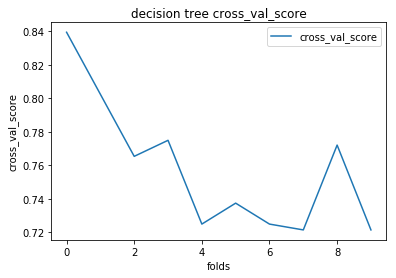

In [5]:
decision_scores=cross_val_score(model,X_train,Y_train,cv=10)
print(decision_scores)

mt.title('decision tree cross_val_score')
mt.plot(range(len(decision_scores)),decision_scores,label='cross_val_score')
mt.xlabel('folds')
mt.ylabel('cross_val_score')
mt.legend()
mt.show()

[0.77777778 0.74074074 0.69135802 0.725      0.75       0.725
 0.7125     0.69620253 0.70886076 0.64556962]


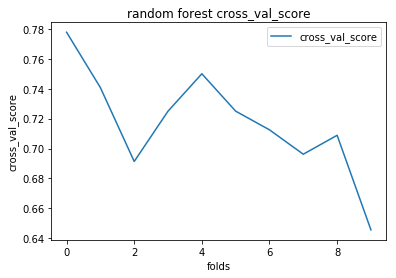

In [6]:
random_scores=cross_val_score(model,X_train,Y_train,cv=10)
print(random_scores)

mt.title('random forest cross_val_score')
mt.plot(range(len(random_scores)),random_scores,label='cross_val_score')
mt.xlabel('folds')
mt.ylabel('cross_val_score')
mt.legend()
mt.show()

In [7]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

# Decision Tree Kfold

testAccuracy: 0.725
testF1: 0.8211382113821138
----
testAccuracy: 0.64375
testF1: 0.7692307692307693
----
testAccuracy: 0.61875
testF1: 0.7288888888888889
----
testAccuracy: 0.74375
testF1: 0.8379446640316206
----
testAccuracy: 0.6625
testF1: 0.7652173913043478
----


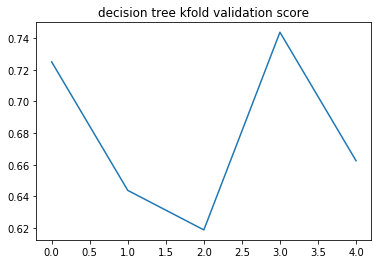

In [8]:
x_num=X_train
dec_score=[]

for train_index, test_index in kf.split(x_num):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    model_k=DecisionTreeClassifier(max_depth=10,min_samples_leaf=0.1,min_samples_split=0.2,random_state=None)
    model_k.fit(X_tr,y_tr)
    
#     ytrainPredicted=model_k.predict(X_tr)
    ytestPredicted=model_k.predict(X_te)
    print('testAccuracy:',accuracy_score(y_te,ytestPredicted))
    print('testF1:',f1_score(y_te,ytestPredicted))
    
    dec_score.append(accuracy_score(y_te,ytestPredicted))
    print('----')

    
mt.title('decision tree kfold validation score')
mt.plot(range(len(dec_score)),dec_score,label='score')
mt.show()

# Random Forest Kfold

testAccuracy: 0.75
testF1: 0.8319327731092437
----
testAccuracy: 0.75
testF1: 0.8214285714285715
----
testAccuracy: 0.69375
testF1: 0.7949790794979079
----
testAccuracy: 0.76875
testF1: 0.8477366255144033
----
testAccuracy: 0.71875
testF1: 0.810126582278481
----


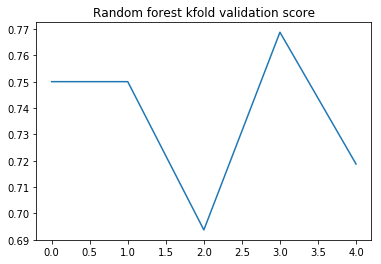

In [9]:
x_num=X_train
rand_score=[]

for train_index, test_index in kf.split(x_num):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    model_k=RandomForestClassifier(n_estimators=8,max_depth=11,max_features=11,min_samples_leaf=3,random_state=None)
    model_k.fit(X_tr,y_tr)
    
#     ytrainPredicted=model_k.predict(X_tr)
    ytestPredicted=model_k.predict(X_te)
    print('testAccuracy:',accuracy_score(y_te,ytestPredicted))
    print('testF1:',f1_score(y_te,ytestPredicted))
    
    rand_score.append(accuracy_score(y_te,ytestPredicted))
    print('----')

    
mt.title('Random forest kfold validation score')
mt.plot(range(len(rand_score)),rand_score,label='score')
mt.show()

In [10]:
np.var(dec_score)

0.002290624999999999

In [11]:
np.var(rand_score)

0.000709375000000001

In [12]:
np.var(dec_score)>np.var(rand_score)

True

# Both

In [16]:
kf = KFold(n_splits=5)

x_num=X_train
rand_score=[]
dec_score=[]

for train_index, test_index in kf.split(x_num):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    
    model_k=DecisionTreeClassifier(max_depth=5,min_samples_leaf=0.1,min_samples_split=0.2,random_state=None)
    model_k.fit(X_tr,y_tr)
    ytestPredicted=model_k.predict(X_te)
    dec_score.append(accuracy_score(y_te,ytestPredicted))
    
    model_k=RandomForestClassifier(n_estimators=8,max_depth=11,max_features=11,min_samples_leaf=3,random_state=None)
    model_k.fit(X_tr,y_tr)
    ytestPredicted=model_k.predict(X_te)
    
    rand_score.append(accuracy_score(y_te,ytestPredicted))


In [18]:
print(np.var(dec_score),np.var(rand_score))
np.var(dec_score)>np.var(rand_score)

0.002290624999999999 0.0011249999999999997


True